# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Tiene dos partes:
1. **Perceptrón a mano**: primero, vamos a estudiar la función sigmoide y la entropía categórica para un caso sencillo, unidimensional. Vamos a encontrar el mínimo de la función de costo haciendo una exploración exhaustiva del espacio de parámetros, simil GridSearch. Podríamos también hacer la parte de gradiente descendiente, pero excede el alcance de lo que queremos presentar en el curso, y además para eso están las librerías como Keras. De todas formas, si alguien se anima, puede intentarlo y lo ayudamos con algunas pistas.
2. **Perceptrón con Keras**: luego, vamos a entrenar un Perceptrón con Keras sobre el mismo dataset. Vamos a usarlo como excusa para presentar las principales características de la librería.
3. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio. Exploramos cómo son las fronteras en 2D. Limitaciones del Perceptrón. Como probablemente no alcance el tiempo en esta clase, esta sección también será el comienzo del siguiente notebook.

## 1. Perceptrón a mano

El objetivo es ajustar un Perceptrón a los datos del Challenger. Recuerden estos datos tienen un solo feature, la temperatura. ¿Cuántos parámetros tendrá el Perceptrón?

1. Escribir una función que, dado un vector x y dos parámetros w0 y w1, calcula la función sigmoide. Hacer un plot para algunos parámetros, tratando de obtener los gráficos de la presentación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [8]:
def sigmoid_function(x,w0, w1):
    '''Equivalente a perceptron con funcion de activacion sigmoide'''
    z = w0 + w1 * x # z como combinacion lineal de x, w0 y w1
    y = 1/(1+np.exp(-z)) # usar lo que dio en z
    return y

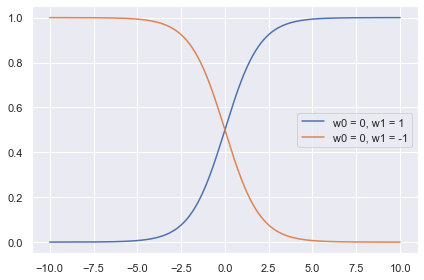

In [9]:
x = np.linspace(-10,10,500)

y = sigmoid_function(x, 0,1)
plt.plot(x,sigmoid_function(x, 0,1), label = 'w0 = 0, w1 = 1')
plt.plot(x,sigmoid_function(x, 0,-1), label = 'w0 = 0, w1 = -1')
plt.legend()
plt.tight_layout()
plt.show()

2. Escribir una función que, dado la etiqueta de una instancia `y` y una predicción `y_pred`, calcula la función de perdida *entropía cruzada*. Hacer un plot para el caso `y = 0` e `y = 1`, tratando de obtener los gráficos de la presentación.

In [10]:
def cross_entropy_loss(y, y_pred):
    L = -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
    return L

/Users/yoel.estrada/miniconda3/envs/acamica/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/yoel.estrada/miniconda3/envs/acamica/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


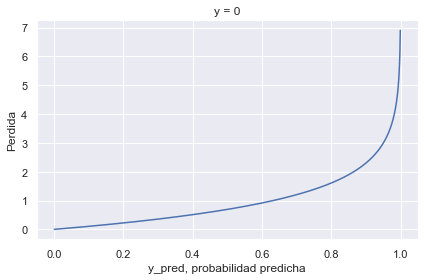

In [11]:
y = 0
ys_pred = np.linspace(0,1,1000)
plt.plot(ys_pred, cross_entropy_loss(y,ys_pred))
plt.xlabel('y_pred, probabilidad predicha')
plt.ylabel('Perdida')
plt.title('y = 0')
plt.tight_layout()
plt.show()

3. Escribir una función que, dado las etiquetas muchas instancias `y` y las predicciones `y_pred`, calcula la función de  costo *entropía cruzada* para todas las instancias. PISTA: hacer un `for` sobre las instancias y llamar a la función `cross_entropy_loss` que crearon antes.

In [25]:
def cross_entropy_cost(y, y_pred):
    ## Un sanity check
    assert y_pred.size == y.size, 'Ojo que los vectores no tienen el mismo tamanio'
    
    y_pred = y_pred.reshape(y_pred.size)
    y = y.reshape(y.size)
    J = 0
    for i in range(y_pred.size):
        J += np.sum(cross_entropy_loss(y[i], y_pred[i]))
    J /= y_pred.size
    return J

In [26]:
### Por si alguno/a quiere ver por que no usamos esta funcion de costo
def MSE(y,y_pred):
    '''Calcula Mean Squared Error'''
    assert(len(y) == len(y_pred))
    n = len(y)
    return ((y - y_pred)**2).sum()/n

**Datos del Challenger**

Cargamos los datos usados en la presentación. Nosotros nos encargamos del preprocesamiento y de los gráficos.

In [20]:
dataset = pd.read_csv('DS_Encuentro_30_Challenger.csv')
dataset.dropna(inplace = True) # Tiramos los NaN (una sola fila)
dataset['Temperature (C)'] = np.round((dataset['Temperature'] - 32)/1.8,2) # pasamos a celcius
dataset

,Date,Temperature,Damage Incident,Temperature (C)
0,04/12/1981,66,0,18.89
1,11/12/1981,70,1,21.11
2,3/22/82,69,0,20.56
4,01/11/1982,68,0,20.00
5,04/04/1983,67,0,19.44
6,6/18/83,72,0,22.22
7,8/30/83,73,0,22.78
8,11/28/83,70,0,21.11
9,02/03/1984,57,1,13.89
10,04/06/1984,63,1,17.22


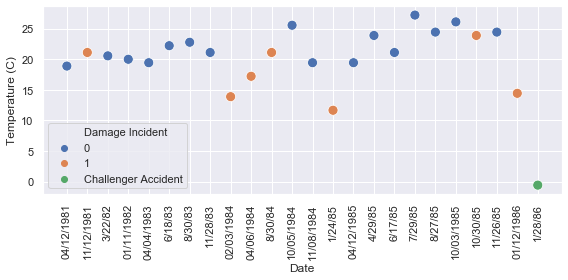

In [21]:
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Date', y  = 'Temperature (C)', hue = 'Damage Incident', data = dataset, s = 100)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.tight_layout()
plt.show()

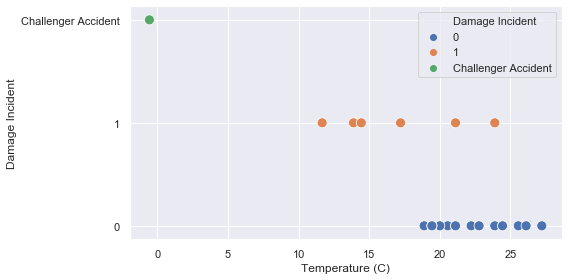

In [22]:
# dataset.drop([24], inplace = True)
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Temperature (C)', y  = 'Damage Incident', hue = 'Damage Incident', data = dataset, s = 100)
plt.tight_layout()
plt.show()

**Variables para entrenamiento**

In [23]:
X = dataset.drop([24])['Temperature (C)'].values
y = dataset.drop([24])['Damage Incident'].values.astype(int)

Es muy importante reescalar los datos cuando trabajen con Redes Neuronales

In [24]:
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean)/X_std

**Explorando la función de costo**

El objetivo es lograr obtener el gráfico de la función de costo como hicimos la clase anterior. Para ellos, es importante que respondan: ¿cuántos parámetros tiene la función sigmoide/perceptrón?¿Qué tipo de gráfico quieren obtener?

1. Crear un arreglo con valores para w0 y w1 (`w0s, w1s`)

In [32]:
w0s = np.linspace(-2,20,50)
w1s = np.linspace(-2,20,50)

2. Recorrer los dos arreglos y calcular el costo para cada combinación de parámetros `w0, w1`

In [33]:
#%%time
costos = []
for w0 in w0s:
    for w1 in w1s:
        y_pred = sigmoid_function(X.flatten(), w0, w1)
#         costos.append(MSE(y,y_pred))
        costos.append(cross_entropy_cost(y, y_pred))
costos = np.array(costos)

/Users/yoel.estrada/miniconda3/envs/acamica/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


3. Graficar

In [34]:
W0s, W1s = np.meshgrid(w0s,w1s, indexing = 'ij')
costos_matriz = costos.reshape(w0s.size, w1s.size)

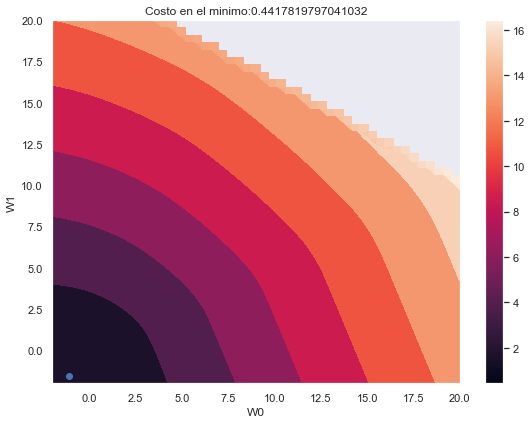

In [35]:
idxs_minimo = np.unravel_index(costos_matriz.argmin(), costos_matriz.shape)
fig = plt.figure(figsize = (8,6))
ax = fig.gca()

plt.pcolormesh(W0s, W1s,costos_matriz)
ax.contourf(W0s, W1s, costos_matriz)
plt.colorbar()
plt.scatter(W0s[idxs_minimo], W1s[idxs_minimo])
plt.title('Costo en el minimo:' + str(costos_matriz[idxs_minimo]))
plt.xlabel('W0')
plt.ylabel('W1')
plt.tight_layout()
plt.show()

In [36]:
w0_encontrado = W0s[idxs_minimo]
w1_encontrado = W1s[idxs_minimo]

print('w0 encontrado:', w0_encontrado)
print('w1 encontrado:', w1_encontrado)

w0 encontrado: -1.1020408163265305
w1 encontrado: -1.5510204081632653


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(W0s, W1s,costos_matriz,linewidth=0.0, antialiased=False, cmap = 'plasma')
# ax.view_init(0, 180)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('costo')
plt.tight_layout()
plt.colorbar(surf)    
plt.show()

4. Graficar la función sigmoide para los parámetros obtenidos.

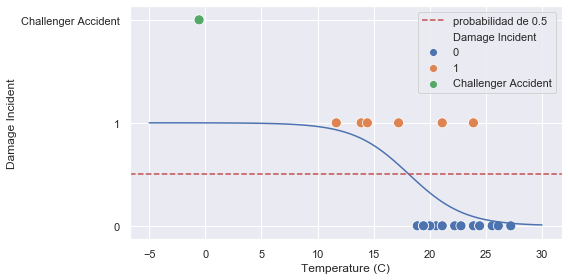

In [37]:
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Temperature (C)', y  = 'Damage Incident', hue = 'Damage Incident', data = dataset, s = 100)

x_plot = np.linspace(-5,30,100)
z = (x_plot - X_mean)/X_std
plt.plot(x_plot, sigmoid_function(z,w0_encontrado,w1_encontrado))

plt.axhline(0.5, ls = '--', c = 'r', label = 'probabilidad de 0.5')
plt.legend()
plt.tight_layout()
plt.show()

## 2. Perceptron con Keras


Keras es un entorno de desarrollo para Redes Neuronales de alto nivel. Esto quiere decir que es - o al menos trata de ser- más amigable que otros entornos de desarrollo, como por ejemplo TensorFlow. Sin embargo, está basado en TensorFlow, que es quien hace el "trabajo pesado". Una de las principales ventajas de Keras es que es rápido para hacer prototipos, hay muchas funciones de costo, optimizadores y tipo de neuronas implementadas, lo cual lo hacen muy versátil.

Tal vez una desventaja sea que la documentación tiende a ser escueta. Pero por otro lado hay muchos ejemplos y tutoriales en internet que se pueden usar que están buenos.

https://keras.io/getting-started/sequential-model-guide/

Los pasos básicos a seguir con Keras son:
1. Definimos un modelo: indicamos cantidad y tipos de neuronas.
2. Compilamos el modelo: indicamos función de costo y optimizador.
3. Entrenamos el modelo: cantidad de iteraciones y otros parámetros.

1. Definimos el modelo. El tipo de modelo se llama `Sequential` y le agregamos una capa (`layer`) con una Neurona `Dense`, con una función de activación `'sigmoid'`.

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


2. Compilamos el modelo llamando a `model.compile(...)`. Los argumentos más importantes son el optimizador `optimizer`, la pérdida `loss` y, si queremos, un métrica que evalúa durante el entrenamiento. **Importante**: solamente la evalúa, nada más.

La forma en que pasamos los argumentos no es la única que hay, también se pueden crear *objetos* optimizadores y pasarles argumentos de forma más detallada. Mirar algunos ejemplos en la documentación.

In [2]:
# model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer= optimizer,loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


3. Entrenamos el modelo con `model.fit(...)`. Los argumentos son, en primer lugar, los features `X` y las etiquetas `y`, y la cantidad de iteraciones `epochs`.

In [4]:
X = X.reshape(X.size, 1)
history = model.fit(X, y, epochs=1000)

NameError: name 'X' is not defined

Acá ya tenemos el modelo entrenado. Algunas funciones de Keras que están buenas:

1. Obviamente, hacer predicciones:

In [5]:
model.predict([-10])

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=[-10]

¿Qué significa ese número que devuelve?

2. Ver la cantidad de parámetros y capas del modelo. Tendrá más sentido cuando entrenemos redes más profundas

In [6]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

3. Ver la historia de entrenamiento del modelo. History es un objeto con muchas características, pero tiene guardado la pérdida para cada iteración y la métrica que le hayamos pedido que evalúe.

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.figure()
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


4. Se pueden ver los pesos que obtuvo

In [ ]:
print(model.get_weights())

In [ ]:
w0 = model.get_weights()[0][0][0]
w1 = model.get_weights()[1][0]
print(w0,w1)

5. Y, como en todo modelo, podemos graficar el resultado. 

In [ ]:
plt.figure(figsize = (8,4))
plot = sns.scatterplot(x = 'Temperature (C)', y  = 'Damage Incident', hue = 'Damage Incident', data = dataset, s = 100)

x_plot = np.linspace(-5,30,100)
z = (x_plot - X_mean)/X_std
plt.plot(x_plot, model.predict(z))
# plt.plot(x_plot, sigmoid_function(z,w0,w1))

plt.axhline(0.5, ls = '--', c = 'r', label = 'probabilidad de 0.5')
plt.legend()
plt.tight_layout()
plt.show()

## Perceptrón en 2D

Seguimos con la mismas ideas que antes, pero ahora en vez de un feature hay dos. Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs, make_moons
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
                  random_state=0)

X, y = make_moons(n_samples=1000, random_state=0)

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [ ]:
X[:,0] = (X[:,0] - X[:,0].COMPLETAR())/X[:,0].COMPLETAR()
X[:,1] = (X[:,1] - X[:,1].COMPLETAR())/X[:,1].COMPLETAR()

In [ ]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definimos el modelo a entrenar (perceptrón) y volvemos a mirar algunas de sus características.

In [ ]:
model = Sequential()
model.add(COMPLETAR)

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=COMPLETAR,loss=COMPLETAR,metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=COMPLETAR, validation_split=0.25)

In [ ]:
model.summary()

In [ ]:
print(history.history.keys())

Notar que se agregaron una keys, asociadas al set de validación. Grafiquemos.

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿Cuántos parámetros tiene ahora el modelo?

In [ ]:
print(model.get_weights())

Y graficamos las fronteras de decisión. ¿Notan que ya no es una frontera abrupta, sino que hay una zona de cambio?¿A qué se debe?

In [ ]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

**Ejercicio:** volver a correr esta sección, pero reemplazando la función que genera los datos `make_blobs` por `make_moons`. ¿Qué problema ven en el resultado?